In [4]:
%config Completer.use_jedi = False

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import requests
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim

In [31]:
geolocator = Nominatim(user_agent='toronto_explorer')
location = geolocator.geocode('Toronto, ON')
tor_latitude = location.latitude
tor_longitude = location.longitude
print(f'The geographical coordinates of Toronto are {tor_latitude}, {tor_longitude}')

The geographical coordinates of Toronto are 43.6534817, -79.3839347


In [40]:
CLIENTID = 'T10NG1UBRQCPQ0DFAHQCSLH30TUEH5YQXX2XEG51LXKXLR2Z'
CLIENTSECRET = 'WXWWRBQTNNFZ4LXWBQRZEDEGMYMWJEQSVDCULUZX4WRMTF1R'


In [92]:
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
client_id=CLIENTID,
client_secret=CLIENTSECRET,
v='20180323',
ll='{},{}'.format(tor_latitude,tor_longitude),
limit=100
)
data = requests.get(url=url, params=params).json()
data['response'].keys()

dict_keys(['suggestedFilters', 'suggestedRadius', 'headerLocation', 'headerFullLocation', 'headerLocationGranularity', 'totalResults', 'suggestedBounds', 'groups'])

In [93]:
items = data['response']['groups'][0]['items']
items

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '5227bb01498e17bf485e6202',
   'name': 'Downtown Toronto',
   'contact': {},
   'location': {'lat': 43.65323167517444,
    'lng': -79.38529600606677,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.65323167517444,
      'lng': -79.38529600606677}],
    'distance': 113,
    'cc': 'CA',
    'city': 'Toronto',
    'state': 'ON',
    'country': 'Canada',
    'formattedAddress': ['Toronto ON', 'Canada']},
   'categories': [{'id': '4f2a25ac4b909258e854f55f',
     'name': 'Neighborhood',
     'pluralName': 'Neighborhoods',
     'shortName': 'Neighborhood',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
      'suffix': '.png'},
     'primary': True}],
   'verified': False,
   'stats': {'tipCount': 0,
    'usersCount': 0,
    'checkinsCount': 0,
    'visitsCount': 0},
   '

In [102]:
tor_venues = [(v['venue']['name'],v['venue']['location']['lat'],v['venue']['location']['lng'],\
              v['venue']['categories'][0]['name']) for v in items]
tor_venues = pd.DataFrame(tor_venues)
tor_venues[3].value_counts()
tor_venues.columns = ['Name','Latitude','Longitude','Category']
tor_venues

,Name,Latitude,Longitude,Category
0,Downtown Toronto,43.653232,-79.385296,Neighborhood
1,Nathan Phillips Square,43.652270,-79.383516,Plaza
2,Indigo,43.653515,-79.380696,Bookstore
3,CF Toronto Eaton Centre,43.654447,-79.380952,Shopping Mall
4,Poke Guys,43.654895,-79.385052,Poke Place
...,...,...,...,...
95,Leña,43.651722,-79.379205,Latin American Restaurant
96,Pi Co.,43.648651,-79.385874,Pizza Place
97,Bay Adelaide Centre,43.650879,-79.380003,Office
98,Kojin,43.649398,-79.386091,Colombian Restaurant


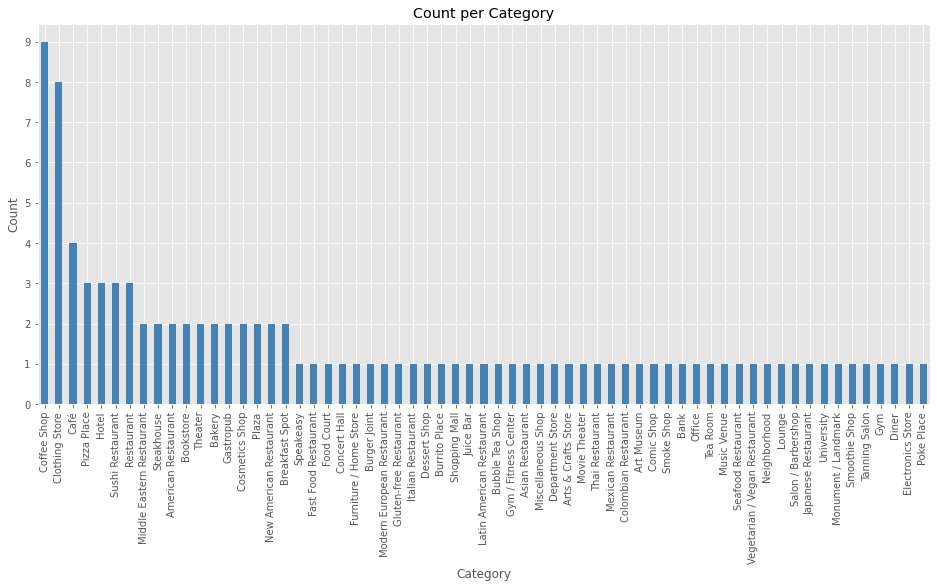

In [121]:
mpl.style.use('ggplot')
plt.figure(figsize=(16,7))
tor_venues['Category'].value_counts().plot(kind='bar',color='steelblue')
plt.yticks(range(0,10))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count per Category')
plt.show()

In [151]:
tormap = folium.Map(location=[tor_latitude,tor_longitude],zoom_start=12)

colorarray = list(map(mpl.colors.rgb2hex,(mpl.cm.rainbow(np.linspace(0,1,len(tor_venues['Category'].unique()))))))


for lat,lng,name,cat in zip(tor_venues['Latitude'],tor_venues['Longitude'],tor_venues['Name'],tor_venues['Category']):
    label = folium.Popup('{}, {}'.format(name,cat),parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color=colorarray[10],
        fill_color=colorarray[10],
        fill_opacity=0.7,
        parse_html=False
    ).add_to(tormap)


tormap

In [138]:
colorarray[0]

array([0.267004, 0.004874, 0.329415, 1.      ])

In [21]:
soup = BeautifulSoup(webdata)

In [22]:
soup


<!DOCTYPE html>

<html lang="en-US">
<head>
<script>
    var __SUPPORTS_TIMING_API = typeof performance === 'object' && !!performance.mark && !! performance.measure && !!performance.getEntriesByType;
    function __perfMark(name) { __SUPPORTS_TIMING_API && performance.mark(name); };
    var __firstPostLoaded = false;
    function __markFirstPostVisible() {
      if (__firstPostLoaded) { return; }
      __firstPostLoaded = true;
      __perfMark("first_post_title_image_loaded");
    }
    var __firstCommentLoaded = false;
    function __markFirstCommentVisible() {
      if (__firstCommentLoaded) { return; }
      __firstCommentLoaded = true;
      __perfMark("first_comment_loaded");
    }
  </script>
<script>__perfMark('head_tag_start');</script>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="origin-when-cross-origin" name="referrer"/>
<style>
  /* http://meyerweb.com/eric/tools/css/reset/
    v2.0 | 20110126
    License: no